In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# Define the input function for training

In [4]:
input_fn = tf.estimator.inputs.numpy_input_fn(
            x = {'images': mnist.train.images}, y=mnist.train.labels,
            batch_size=batch_size, num_epochs=None, shuffle=True
            )

# Define the Neural Network

In [10]:
def neural_net(x_dict):
    # TF Estimator input is a dictionary, in case of multiple inputs
    x = x_dict['images']
    
    #Hidden Fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    
    #hidden fully connected layer 2 with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    
    # output fully connected layer with 10 output classes
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [14]:
def model_fn(features, labels, mode):
    
    # Built the neural networks
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits,axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # if predictions mode is on, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    # Define Loss and accuracy
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=tf.cast(labels,dtype=tf.int32)))
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op =optimizer.minimize(loss_op,global_step=tf.train.get_global_step())
    
    
    acc_op = tf.metrics.accuracy(labels=labels,predictions=pred_classes)
    
    
    estim_specs = tf.estimator.EstimatorSpec(
    
    
        mode=mode,
        predictions=pred_classes,
        loss = loss_op,
        train_op=train_op,
        eval_metric_ops = {'accuracy':acc_op}  )
    
    return estim_specs

# Build the Estimator

In [15]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PULKIT~1.GOE\\AppData\\Local\\Temp\\tmpd5iw58ax', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002921E82BC18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
# Train the Model
model.train(input_fn,steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\PULKIT~1.GOE\AppData\Local\Temp\tmpd5iw58ax\model.ckpt.
INFO:tensorflow:loss = 2.5225048, step = 1
INFO:tensorflow:global_step/sec: 359.101
INFO:tensorflow:loss = 0.35812005, step = 101 (0.285 sec)
INFO:tensorflow:global_step/sec: 371.522
INFO:tensorflow:loss = 0.23130828, step = 201 (0.263 sec)
INFO:tensorflow:global_step/sec: 394.311
INFO:tensorflow:loss = 0.1560123, step = 301 (0.254 sec)
INFO:tensorflow:global_step/sec: 359.414
INFO:tensorflow:loss = 0.35659957, step = 401 (0.278 sec)
INFO:tensorflow:global_step/sec: 332.915
INFO:tensorflow:loss = 0.37267023, step = 501 (0.300 sec)
INFO:tensorflow:global_step/sec:

In [17]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images':mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# use the estimator Evaluate method
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-07T09:27:50Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\PULKIT~1.GOE\AppData\Local\Temp\tmpd5iw58ax\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-07-09:27:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9167, global_step = 1000, loss = 0.29244748
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\PULKIT~1.GOE\AppData\Local\Temp\tmpd5iw58ax\model.ckpt-1000


{'accuracy': 0.9167, 'loss': 0.29244748, 'global_step': 1000}

# Predict the images

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PULKIT~1.GOE\AppData\Local\Temp\tmpd5iw58ax\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


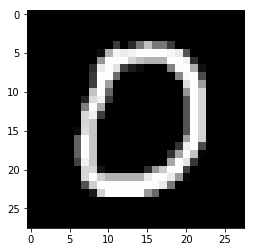

Model Prediction :  0


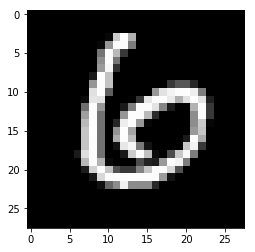

Model Prediction :  6


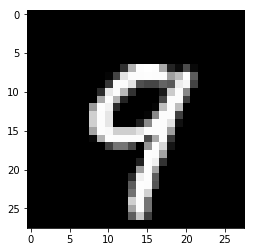

Model Prediction :  9


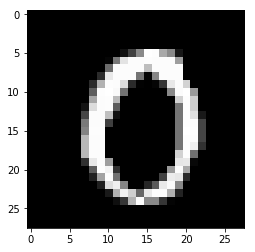

Model Prediction :  0


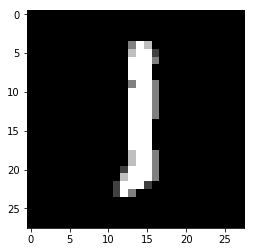

Model Prediction :  1


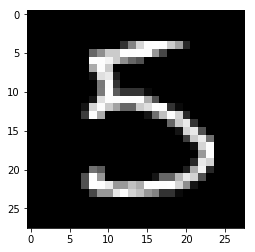

Model Prediction :  5


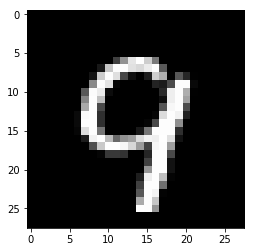

Model Prediction :  9


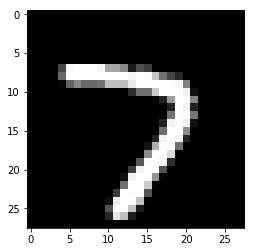

Model Prediction :  7


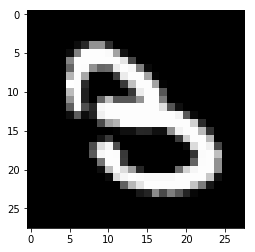

Model Prediction :  3


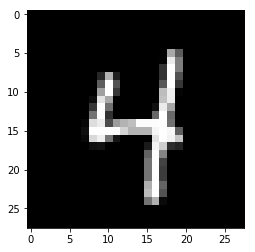

Model Prediction :  4


In [21]:
n_images =4
test_images = mnist.test.images[10:20]

# Prepae the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
            x={'images':test_images}, shuffle=False)

# use the model to predict the image class
preds = list(model.predict(input_fn))

# Display the samples

for i in range(10):
    plt.imshow(np.reshape(test_images[i],[28,28]), cmap='gray')
    plt.show()
    print("Model Prediction : ", preds[i])